In [1]:
from struct_pop_delta import *
import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['font.family'] = 'Arial'

This notebook illustrates the use of the code _struct_pop_delta.py_, to model the evolution of structured populations, in a serial dilution model with environemnt heterogeneity across the structure. 
We model a spatially structured population as a set of well-mixed demes, each sitting on one node of a connected graph with $D$ nodes (see the figure below). In deme $i$, wild-types have fitness $f_W = 1$ and mutants $f_M = 1 + \delta_i s$. Thus, the vector $\delta \in \mathbb{R}^D$ represents the heterogeneity in the environment.

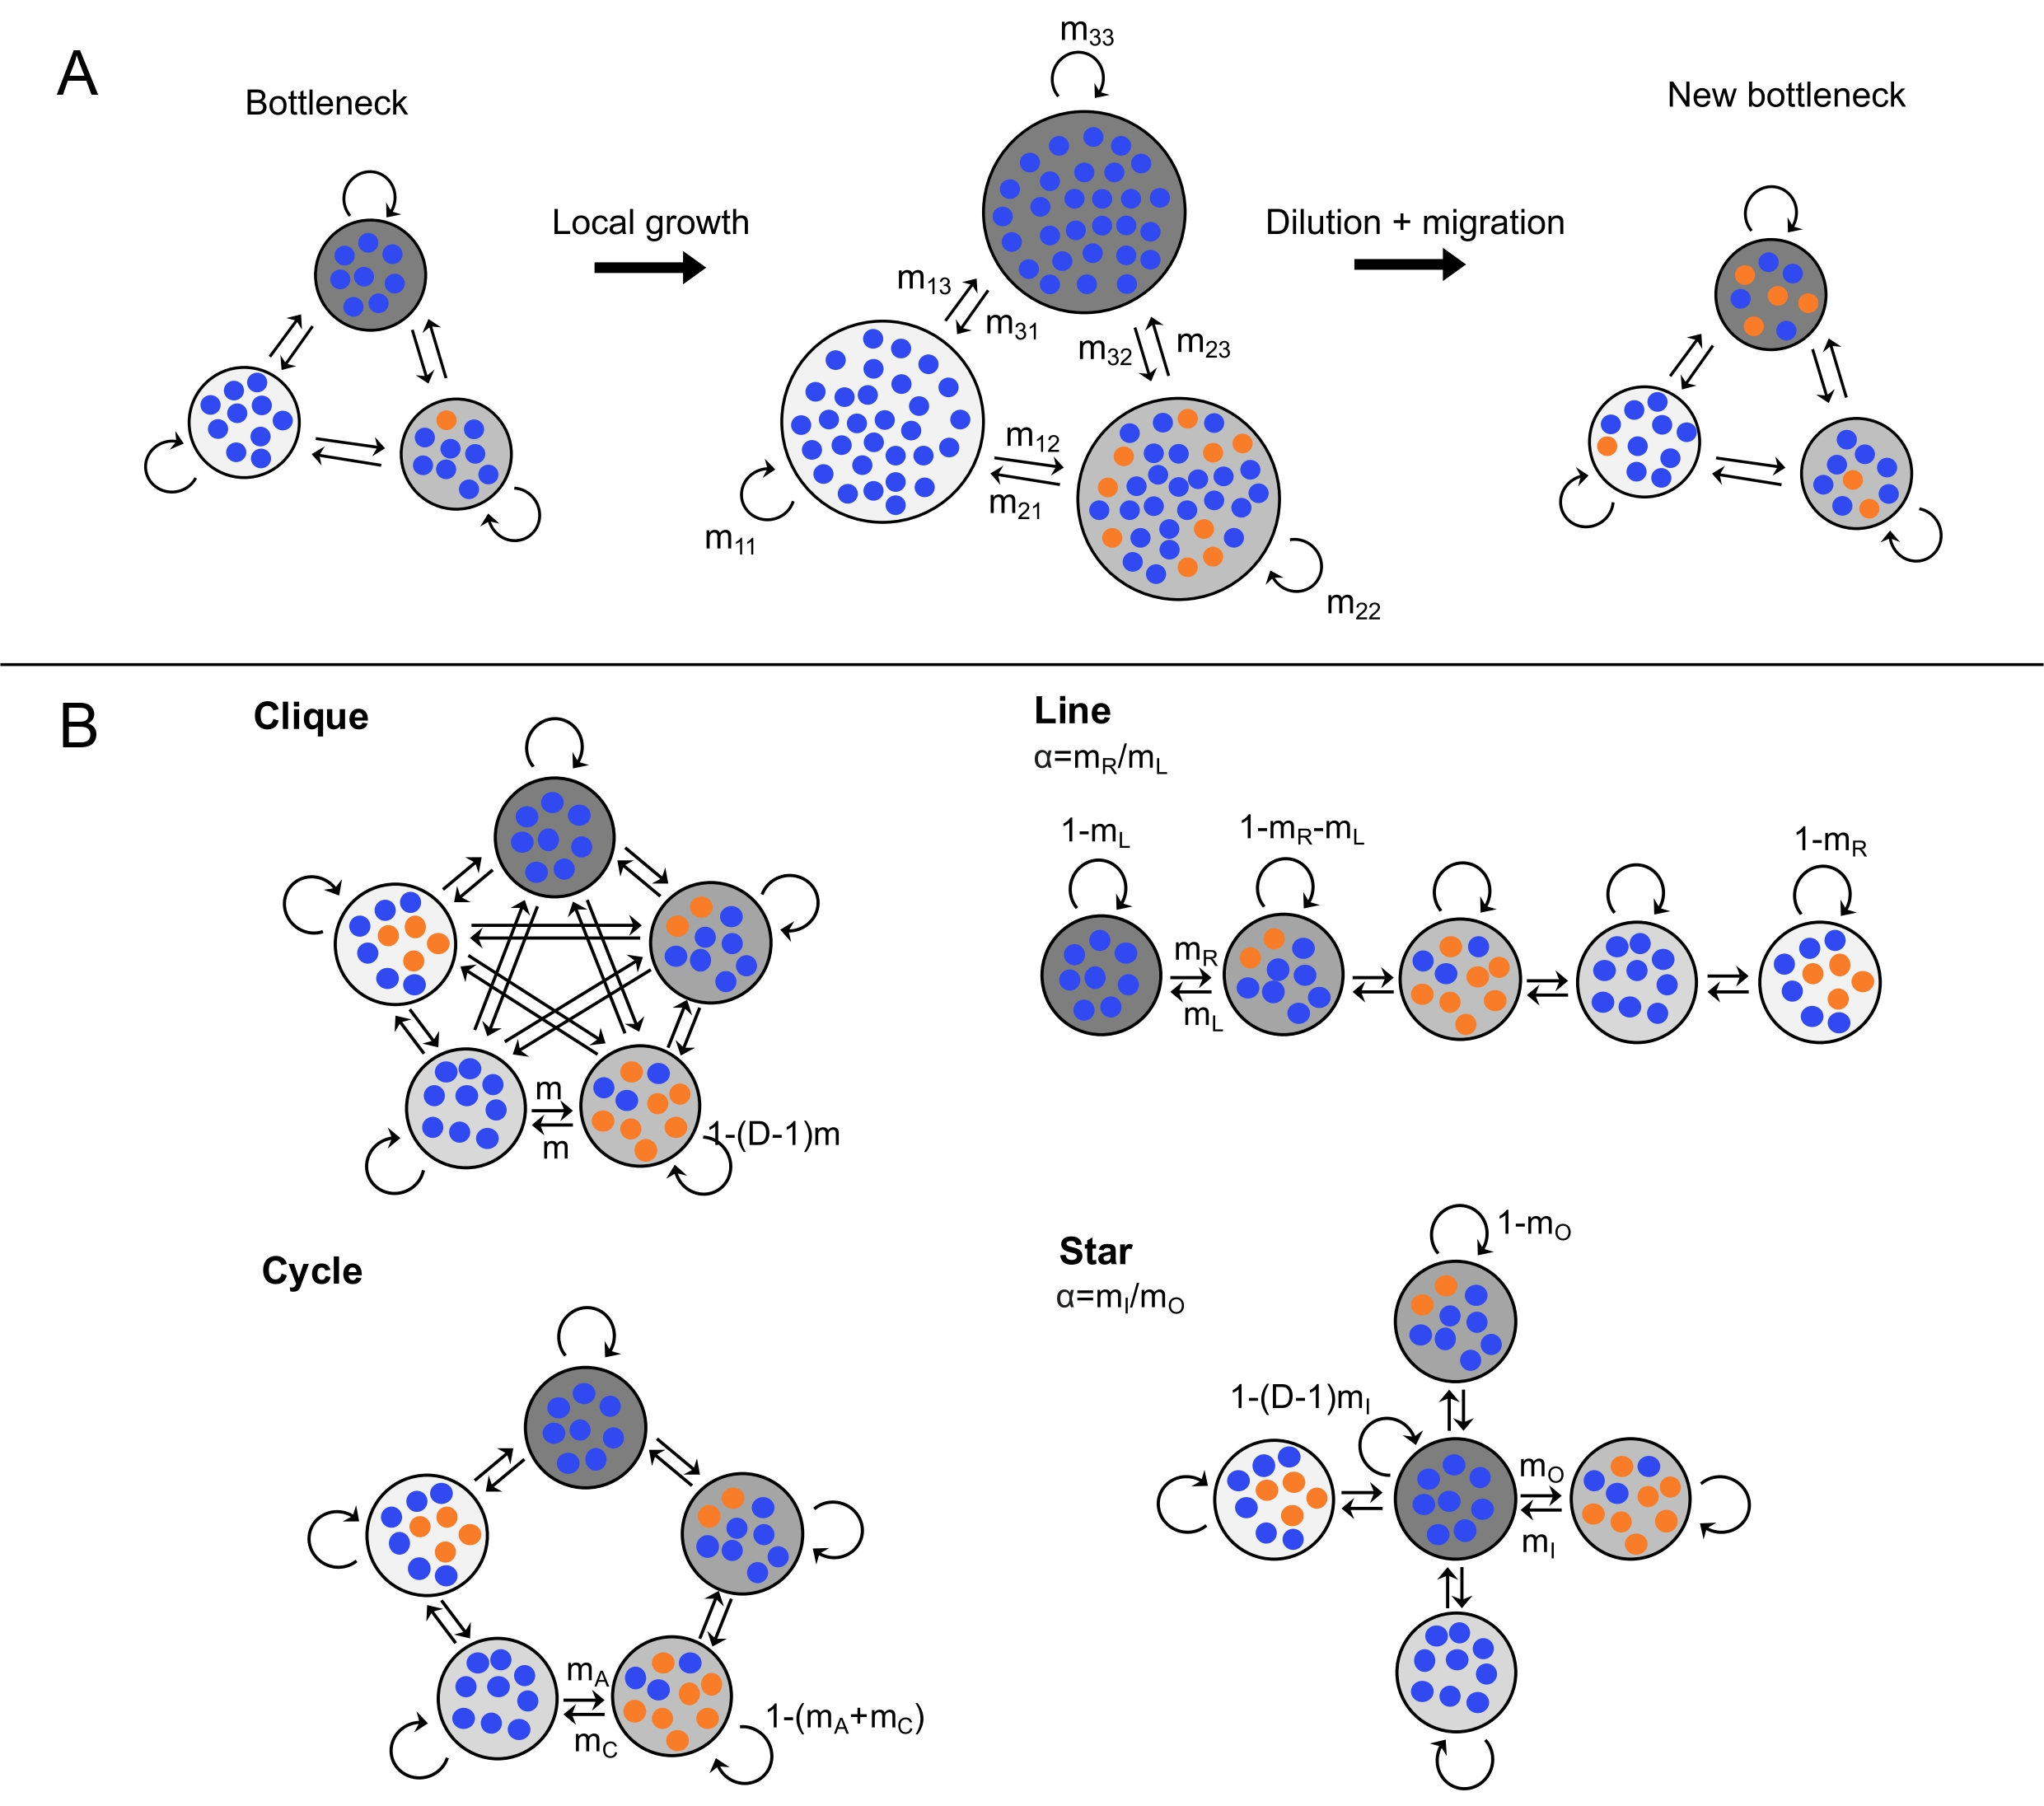

In [2]:
Image('FigSI1.jpg', width=700)

This code was used to generate figures in the paper _Environment heterogeneity creates fast amplifiers of natural selection in graph-structured populations_, by Cecilia Fruet, Arthur Alexandre, Alia Abbara, Claude Loverdo, and Anne-Florence Bitbol.

## Illustration of the code on the line graph

### Fitness vs fixation probability plot

We first fix the graph parameters, that determine the spatial structure of the population. In this case, we are defining a line composed of $D$ demes with probability for migrations to the right $m_R$ and to the left $m_L$. The option "equal_contribution" is False, meaning that for each deme $j$, $\sum_i m_{ij}=1$, i.e. each deme receives on average $K \sum_i m_{ij}=1$, leading to a new bottleneck state after migration same contribution in average.

In [3]:
mR = 0.45
mL = 0.3
D = 5
migration_matrix_line = define_line(D, mR, mL, equal_contribution=False)

The migration matrix then looks like:

In [4]:
print(migration_matrix_line)

[[0.7  0.45 0.   0.   0.  ]
 [0.3  0.25 0.45 0.   0.  ]
 [0.   0.3  0.25 0.45 0.  ]
 [0.   0.   0.3  0.25 0.45]
 [0.   0.   0.   0.3  0.55]]


We also define the bottleneck size $K$ and the growth time $t$:

In [5]:
K = 1000
t = 5

Then the fitness parameters: the baseline mutant fitness advantage $s$, and the prefactor for environment heterogeneity $\mathbf{\delta}$, i.e., the prefactor for the mutant fitness advantage in each deme:

In [6]:
delta = np.array([1, 0, 0, 0, 0]).astype(float)
s_array = np.linspace(1e-4, 0.004, 12).astype(float)

We initialize the population at the bottleneck size with one mutant in the leftmost deme:

In [7]:
in_numbers = np.array([[1,K-1],[0,K],[0,K],[0,K],[0,K]]).astype(np.int64)

The simulation number and the number of cycles for the simulation:

In [8]:
nb_sim=50000
nb_cycles=10000


Run the simulation:

In [ ]:
fixation_probas = []

for s in s_array:
    fitnesses = np.array([[1 + d * s, 1] for d in delta]).astype(float)
    et, ci95et, ft, ci95ft, fp = fixation_probability(in_numbers, migration_matrix_line, fitnesses, nb_sim, nb_cycles, t, K, size_follow_numbers=1000, print_frequency=1)
    fixation_probas.append([fp, et, ci95et, ft, ci95ft])

Text(0, 0.5, 'Fixation probability')

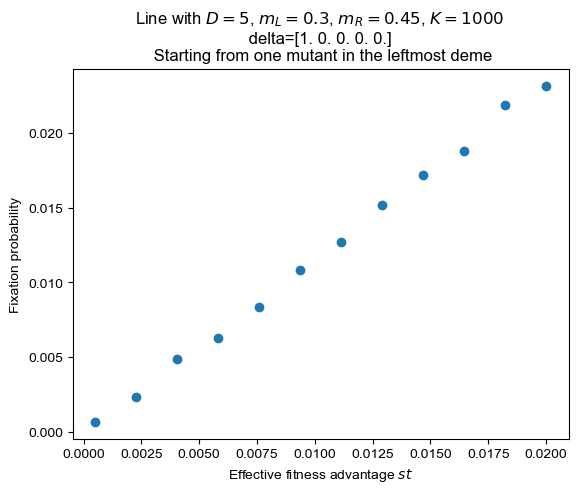

In [11]:
plt.plot(s_array*t, np.array(fixation_probas)[:,0], linestyle='None', marker='o')
plt.title(f'Line with $D={D}$, $m_L={mL}$, $m_R={mR}$, $K={K}$ \n delta={delta} \n Starting from one mutant in the leftmost deme')
plt.xlabel('Effective fitness advantage $st$')
plt.ylabel('Fixation probability')

Text(0, 0.5, 'Extinction time')

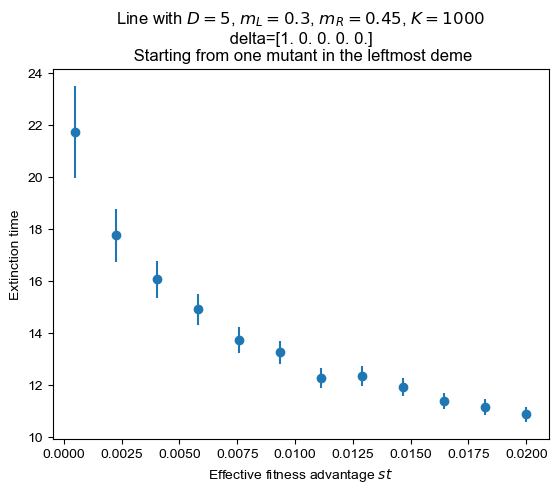

In [12]:
plt.errorbar(s_array*t, np.array(fixation_probas)[:,1], yerr = np.array(fixation_probas)[:,2], linestyle='None', marker='o')
plt.title(f'Line with $D={D}$, $m_L={mL}$, $m_R={mR}$, $K={K}$ \n delta={delta} \n Starting from one mutant in the leftmost deme')
plt.xlabel('Effective fitness advantage $st$')
plt.ylabel('Extinction time')

Text(0, 0.5, 'Fixation time')

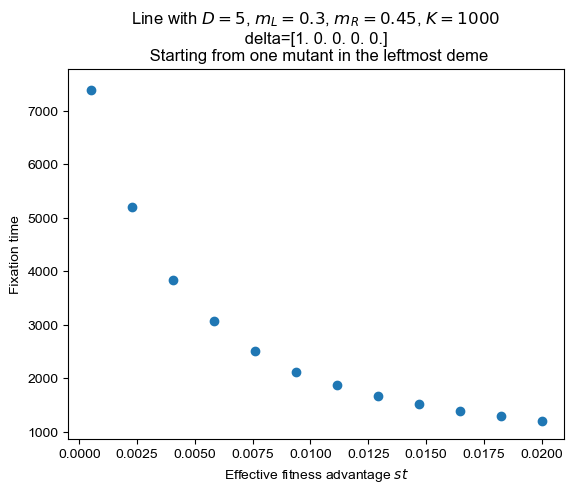

In [13]:
plt.errorbar(s_array*t, np.array(fixation_probas)[:,3], yerr = np.array(fixation_probas)[:,4], linestyle='None', marker='o')
plt.title(f'Line with $D={D}$, $m_L={mL}$, $m_R={mR}$, $K={K}$ \n delta={delta} \n Starting from one mutant in the leftmost deme')
plt.xlabel('Effective fitness advantage $st$')
plt.ylabel('Fixation time')